In [102]:
pip install yfinance

In [103]:
#import the lib

import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [104]:
df = yf.download("INTC",start="2010-10-01", end="2012-09-10")
df.reset_index(drop=False, inplace=True)
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
2010-10-01,2010-10-01,19.469999,20.350000,18.879999,19.320000,14.256554,41275000
2010-10-04,2010-10-04,19.250000,19.299999,18.770000,18.870001,13.924494,67082000
2010-10-05,2010-10-05,19.080000,19.290001,19.030001,19.150000,14.131112,61004600
2010-10-06,2010-10-06,19.209999,19.370001,19.129999,19.309999,14.249174,54990000
2010-10-07,2010-10-07,19.370001,19.540001,19.209999,19.400000,14.315595,51794600
...,...,...,...,...,...,...,...
2012-08-31,2012-08-31,24.500000,25.000000,24.480000,24.830000,19.582632,43447800
2012-09-04,2012-09-04,25.030001,25.059999,24.270000,24.420000,19.259279,40688000
2012-09-05,2012-09-05,24.400000,24.780001,24.190001,24.389999,19.235619,38595800
2012-09-06,2012-09-06,24.469999,25.100000,24.459999,25.100000,19.795570,40187600


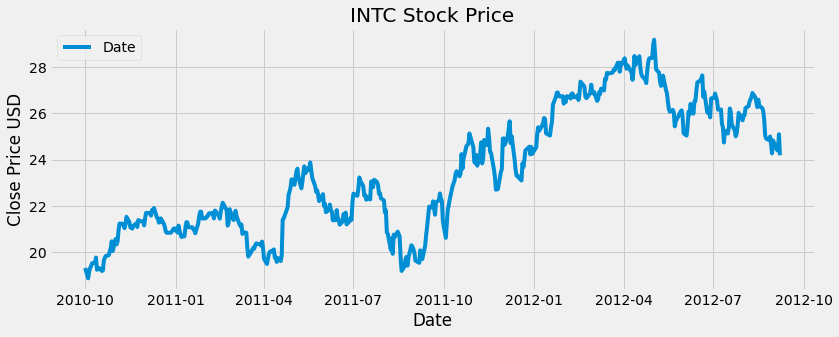

In [105]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label = 'Close Price')
plt.title('INTC Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [106]:
#calculate typical price
typical_price = (df['Close'] + df['High'] + df['Low'])/3
typical_price

2010-10-01    19.516666
2010-10-04    18.980000
2010-10-05    19.156667
2010-10-06    19.270000
2010-10-07    19.383333
                ...    
2012-08-31    24.770000
2012-09-04    24.583333
2012-09-05    24.453334
2012-09-06    24.886667
2012-09-07    24.300001
Length: 489, dtype: float64

In [107]:
#Get the period
period = 14

In [108]:
#calculate
money_flow = typical_price * df['Volume']
money_flow

2010-10-01    8.055504e+08
2010-10-04    1.273216e+09
2010-10-05    1.168645e+09
2010-10-06    1.059657e+09
2010-10-07    1.003952e+09
                  ...     
2012-08-31    1.076202e+09
2012-09-04    1.000247e+09
2012-09-05    9.437960e+08
2012-09-06    1.000135e+09
2012-09-07    2.096655e+09
Length: 489, dtype: float64

In [109]:
#Get all the positive and negative money flows
positive_flow = []
negative_flow = []

#loop throught the typical price
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)

In [110]:
#Get all negative and possitive flows within the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i + 1- period : i+1]) )
for i in range(period-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i + 1- period : i+1]) )

In [111]:
#Calcalute the money flow index
mfi = 100*(np.array(positive_mf)/(np.array(positive_mf) + np.array(negative_mf) ))
mfi


array([62.08287706, 67.39033167, 66.92709963, 66.48578734, 66.59791772,
       66.53294793, 60.18253243, 60.56641364, 63.08910097, 70.94676822,
       70.84023383, 78.25140523, 78.41527229, 71.07539079, 63.7767    ,
       56.31461376, 57.57684925, 48.21739637, 41.90807032, 43.08109209,
       44.36391297, 45.06971261, 51.05898597, 52.2367551 , 51.84555751,
       44.96004044, 42.23431727, 42.58816552, 49.33537042, 56.13601515,
       54.93331149, 59.6533275 , 66.31259743, 65.54571906, 73.58383781,
       74.13013763, 66.3935099 , 62.74639802, 56.76123094, 56.74491597,
       57.69651941, 56.8780551 , 51.09537285, 44.93665259, 38.0366934 ,
       38.99937121, 37.70672512, 35.09454595, 29.64393637, 18.41739006,
       19.90252326, 33.48706912, 31.2373679 , 30.11058842, 20.01176173,
       31.61412384, 38.95194362, 47.03581432, 46.67863161, 41.75102342,
       33.0461295 , 29.4695918 , 26.51197095, 30.67326656, 35.39791503,
       36.92486661, 43.9856532 , 49.72610224, 52.45983647, 45.87

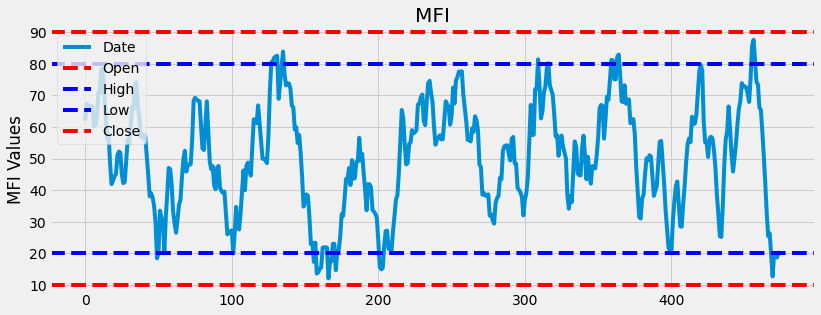

In [112]:
#Visual show the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create the plot
plt.figure(figsize=(12.2,4.5))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(10, linestyle='--',color = 'red')
plt.axhline(20, linestyle='--',color = 'blue')
plt.axhline(80, linestyle='--',color = 'blue')
plt.axhline(90, linestyle='--',color = 'red')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(df.columns.values, loc='upper left')
plt.show()


In [113]:
#create new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

In [114]:
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI
2010-10-21,2010-10-21,19.750000,19.860001,19.570000,19.760000,14.581241,74287500,62.082877
2010-10-22,2010-10-22,19.790001,19.930000,19.750000,19.840000,14.640274,50129800,67.390332
2010-10-25,2010-10-25,19.950001,20.000000,19.799999,19.870001,14.662413,45769400,66.927100
2010-10-26,2010-10-26,19.790001,20.110001,19.730000,20.040001,14.787857,56344600,66.485787
2010-10-27,2010-10-27,19.930000,20.200001,19.809999,20.190001,14.898543,48151900,66.597918
...,...,...,...,...,...,...,...,...
2012-08-31,2012-08-31,24.500000,25.000000,24.480000,24.830000,19.582632,43447800,19.742183
2012-09-04,2012-09-04,25.030001,25.059999,24.270000,24.420000,19.259279,40688000,19.055128
2012-09-05,2012-09-05,24.400000,24.780001,24.190001,24.389999,19.235619,38595800,18.661696
2012-09-06,2012-09-06,24.469999,25.100000,24.459999,25.100000,19.795570,40187600,20.228916


In [115]:
#function get buy and sell signals
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal, sell_signal)

In [116]:
#add new columns (buy and sell)
new_df['Buy'] = get_signal(new_df,80,20)[0]
new_df['Sell'] = get_signal(new_df,80,20)[1]
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
2010-10-21,2010-10-21,19.750000,19.860001,19.570000,19.760000,14.581241,74287500,62.082877,NaN,NaN
2010-10-22,2010-10-22,19.790001,19.930000,19.750000,19.840000,14.640274,50129800,67.390332,NaN,NaN
2010-10-25,2010-10-25,19.950001,20.000000,19.799999,19.870001,14.662413,45769400,66.927100,NaN,NaN
2010-10-26,2010-10-26,19.790001,20.110001,19.730000,20.040001,14.787857,56344600,66.485787,NaN,NaN
2010-10-27,2010-10-27,19.930000,20.200001,19.809999,20.190001,14.898543,48151900,66.597918,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2012-08-31,2012-08-31,24.500000,25.000000,24.480000,24.830000,19.582632,43447800,19.742183,24.830000,NaN
2012-09-04,2012-09-04,25.030001,25.059999,24.270000,24.420000,19.259279,40688000,19.055128,24.420000,NaN
2012-09-05,2012-09-05,24.400000,24.780001,24.190001,24.389999,19.235619,38595800,18.661696,24.389999,NaN
2012-09-06,2012-09-06,24.469999,25.100000,24.459999,25.100000,19.795570,40187600,20.228916,NaN,NaN


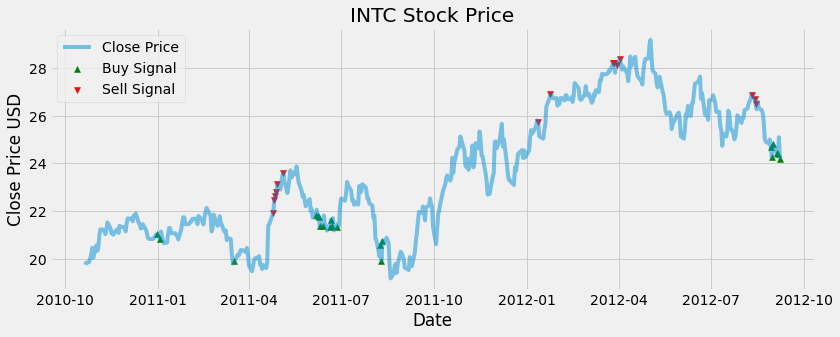

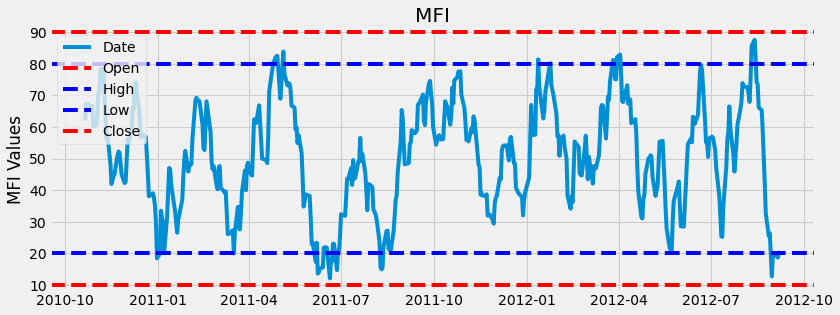

In [117]:
#plot the data 
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label = 'Buy Signal', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.title('INTC Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

#MFI plot
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df['MFI'], label = 'MFI')
plt.axhline(10, linestyle='--',color = 'red')
plt.axhline(20, linestyle='--',color = 'blue')
plt.axhline(80, linestyle='--',color = 'blue')
plt.axhline(90, linestyle='--',color = 'red')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(df.columns.values, loc='upper left')
plt.show()